In [1]:
from lmpy import lm, data, AIC

## Examples from *Linear Models with R* (Faraway, 2014)

### 2.6

In [2]:
gala = data('gala', package='faraway')
m = lm('Species ~ Area + Adjacent + Elevation + Nearest + Scruz', gala)
m.summary()

Formula: Species ~ Area + Adjacent + Elevation + Nearest + Scruz

Coefficients:
           Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)     
Intercept     7.068      19.154   -32.464     46.601     0.369     0.715     
Adjacent     -0.075       0.018    -0.111     -0.038    -4.226     0.000  ***
Area         -0.024       0.022    -0.070      0.022    -1.068     0.296     
Elevation     0.319       0.054     0.209      0.430     5.953     0.000  ***
Nearest       0.009       1.054    -2.166      2.185     0.009     0.993     
Scruz        -0.241       0.215    -0.685      0.204    -1.117     0.275     

n = 30, p = 6, Residual SE = 60.975 on 24 DF
R-Squared = 0.7658, adjusted R-Squared = 0.7171
F-statistics = 15.6994 on 5 and 24 DF, p-value: 6.837893e-07

Log Likelihood = -162.5350, AIC = 339.0700, BIC = 348.8784


### 2.10

In [3]:
odor = data('odor', package='faraway')
m = lm('odor ~ temp + gas + pack', odor)
m.summary(cor=True)

Formula: odor ~ temp + gas + pack

Coefficients:
           Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)   
Intercept    15.200       9.298    -5.265     35.665     1.635     0.130   
gas         -17.000      12.732   -45.023     11.023    -1.335     0.209   
pack        -21.375      12.732   -49.398      6.648    -1.679     0.121   
temp        -12.125      12.732   -40.148     15.898    -0.952     0.361   

n = 15, p = 4, Residual SE = 36.012 on 11 DF
R-Squared = 0.3337, adjusted R-Squared = 0.1519
F-statistics = 1.8361 on 3 and 11 DF, p-value: 0.20

Log Likelihood = -72.7155, AIC = 155.4310, BIC = 158.9713

Correlation of Coefficients:
      gas  pack  temp
gas  1.00  0.00  0.00
pack 0.00  1.00 -0.00
temp 0.00 -0.00  1.00


### 4.2

In [4]:
fat = data('fat', 'faraway')
formula = 'brozek ~ age + weight + height + neck + chest + abdom + hip + thigh + knee + ankle + biceps + forearm + wrist'
m = lm(formula, data=fat)
m.summary()

Formula: brozek ~ age + weight + height + neck + chest + abdom + hip + thigh + knee + ankle + biceps + forearm + wrist

Coefficients:
           Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)     
Intercept   -15.293      16.070   -46.950     16.365    -0.952     0.342     
abdom         0.885       0.080     0.728      1.043    11.057     0.000  ***
age           0.057       0.030    -0.002      0.116     1.895     0.059    .
ankle         0.164       0.205    -0.241      0.568     0.797     0.426     
biceps        0.153       0.159    -0.159      0.465     0.964     0.336     
chest        -0.024       0.092    -0.205      0.157    -0.257     0.797     
forearm       0.430       0.184     0.067      0.794     2.334     0.020    *
height       -0.065       0.089    -0.240      0.111    -0.726     0.468     
hip          -0.198       0.135    -0.465      0.068    -1.468     0.143     
knee         -0.012       0.224    -0.453      0.430    -0.052     0.958     
neck    

In [5]:
x0 = m.X.median().to_frame()
m.predict(Xnew=x0.T, interval='prediction')

,Fitted,PI[2.5%],PI[97.5]%
0,17.49322,9.337654,25.648786


In [6]:
x0 = m.X.median().to_frame()
m.predict(Xnew=x0.T, interval='confidence')

,Fitted,CI[2.5%],CI[97.5]%
0,17.49322,15.303962,19.682478


## Examples from *Generalized Additive Models* (Wood, 2017)

### 1.5.1-1.5.3

In [7]:
sperm1 = data('sperm.comp1', 'gamair')

In [8]:
scmod1 = lm('count ~ time.ipc + prop.partner', sperm1)
scmod1.summary()

Formula: count ~ time.ipc + prop.partner

Coefficients:
              Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)    
Intercept      357.418      88.082   165.504    549.333     4.058     0.002  **
prop.partner  -339.560     126.253  -614.643    -64.478    -2.690     0.020   *
time.ipc         1.942       0.907    -0.034      3.917     2.141     0.053   .

n = 15, p = 3, Residual SE = 136.609 on 12 DF
R-Squared = 0.4573, adjusted R-Squared = 0.3669
F-statistics = 5.0562 on 2 and 12 DF, p-value: 0.03

Log Likelihood = -93.3673, AIC = 194.7346, BIC = 197.5668


In [9]:
scmod2 = lm('count ~ time.ipc + {prop.partner*time.ipc}', sperm1)
scmod2.summary()

Formula: count ~ time.ipc + {prop.partner*time.ipc}

Coefficients:
                       Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)    
Intercept               140.470      64.063     0.889    280.051     2.193     0.049   *
prop.partner*time.ipc    -5.478       1.741    -9.271     -1.685    -3.146     0.008  **
time.ipc                  5.618       1.549     2.242      8.994     3.626     0.003  **

n = 15, p = 3, Residual SE = 128.023 on 12 DF
R-Squared = 0.5234, adjusted R-Squared = 0.4440
F-statistics = 6.5888 on 2 and 12 DF, p-value: 0.01

Log Likelihood = -92.3937, AIC = 192.7874, BIC = 195.6196


In [10]:
scmod3 = lm('count ~ prop.partner', sperm1)
scmod4 = lm('count ~ 1', sperm1)

In [11]:
AIC(scmod1, scmod3, scmod4)

,df,AIC
formula,,
count ~ time.ipc + prop.partner,4,194.73459986191912
count ~ prop.partner,3,197.58888408833025
count ~ 1,2,199.90314077066657


### 1.6.4

In [12]:
PlantGrowth = data('PlantGrowth')
pgm1 = lm('weight ~ group', data=PlantGrowth)
pgm1.summary()

Formula: weight ~ group

Coefficients:
               Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)     
Intercept         5.032       0.197     4.628      5.436    25.527     0.000  ***
group[T.trt1]    -0.371       0.279    -0.943      0.201    -1.331     0.194     
group[T.trt2]     0.494       0.279    -0.078      1.066     1.772     0.088    .

n = 30, p = 3, Residual SE = 0.623 on 27 DF
R-Squared = 0.2641, adjusted R-Squared = 0.2096
F-statistics = 4.8461 on 2 and 27 DF, p-value: 0.02

Log Likelihood = -26.8095, AIC = 61.6190, BIC = 67.2238


In [13]:
pmg0 = lm('weight ~ 1', PlantGrowth)
pmg0.summary()

Formula: weight ~ 1

Coefficients:
           Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)     
Intercept     5.073       0.128     4.811      5.335    39.627       0.0  ***

n = 30, p = 1, Residual SE = 0.701 on 29 DF
R-Squared = 0.0000, adjusted R-Squared = 0.0000
Log Likelihood = -31.4104, AIC = 66.8208, BIC = 69.6232


## Examples from Data Analysis Using Regression and Multilevel/Hierarchical Models (Gelman, Hill, 2007)

### 3.4

In [14]:
kidiq = data('kidiq', 'rstanarm')

In [15]:
m1 = lm('kid.score ~ mom.hs + mom.iq', kidiq)
m1.summary()

Formula: kid.score ~ mom.hs + mom.iq

Coefficients:
           Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)     
Intercept    25.732       5.875    14.184     37.279     4.380     0.000  ***
mom.hs        5.950       2.212     1.603     10.297     2.690     0.007   **
mom.iq        0.564       0.061     0.445      0.683     9.309     0.000  ***

n = 434, p = 3, Residual SE = 18.136 on 431 DF
R-Squared = 0.2141, adjusted R-Squared = 0.2105
F-statistics = 58.7241 on 2 and 431 DF, p-value: 2.793258e-23

Log Likelihood = -1871.9945, AIC = 3751.9890, BIC = 3768.2812


### 3.5

In [16]:
m2 = lm('kid.score ~ mom.iq', kidiq)
m2.summary()

Formula: kid.score ~ mom.iq

Coefficients:
           Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)     
Intercept     25.80       5.917    14.169     37.430     4.360       0.0  ***
mom.iq         0.61       0.059     0.495      0.725    10.423       0.0  ***

n = 434, p = 2, Residual SE = 18.266 on 432 DF
R-Squared = 0.2010, adjusted R-Squared = 0.1991
F-statistics = 108.6428 on 1 and 432 DF, p-value: 7.661950e-23

Log Likelihood = -1875.6079, AIC = 3757.2158, BIC = 3769.4349


In [17]:
m3 = lm('kid.score ~ mom.hs + mom.iq + mom.hs:mom.iq', kidiq)
m3.summary()

Formula: kid.score ~ mom.hs + mom.iq + mom.hs:mom.iq

Coefficients:
               Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)     
Intercept       -11.482      13.758   -38.523     15.559    -0.835     0.404     
mom.hs           51.268      15.338    21.122     81.414     3.343     0.001  ***
mom.iq            0.969       0.148     0.677      1.260     6.531     0.000  ***
mom.hs:mom.iq    -0.484       0.162    -0.803     -0.165    -2.985     0.003   **

n = 434, p = 4, Residual SE = 17.971 on 430 DF
R-Squared = 0.2301, adjusted R-Squared = 0.2247
F-statistics = 42.8389 on 3 and 430 DF, p-value: 3.066596e-24

Log Likelihood = -1867.5429, AIC = 3745.0857, BIC = 3765.4510


## Example from *Visreg* (Breheny, Burchett, 2017)

In [18]:
airquality = data('airquality', 'R')
# import pandas as pd
# airquality = pd.read_csv('./data/R/airquality.csv')

In [19]:
fit = lm('Ozone ~ Solar.R + Wind + Temp', data=airquality)
fit.summary()

Formula: Ozone ~ Solar.R + Wind + Temp

Coefficients:
           Estimate  Std. Error  CI[2.5%]  CI[97.5]%  t values  Pr(>|t|)     
Intercept   -64.342      23.055  -110.045    -18.639    -2.791     0.006   **
Solar.R       0.060       0.023     0.014      0.106     2.580     0.011    *
Temp          1.652       0.254     1.149      2.155     6.516     0.000  ***
Wind         -3.334       0.654    -4.631     -2.036    -5.094     0.000  ***

n = 111, p = 4, Residual SE = 21.181 on 107 DF
R-Squared = 0.6059, adjusted R-Squared = 0.5948
F-statistics = 54.8337 on 3 and 107 DF, p-value: 1.508994e-21

Log Likelihood = -494.3586, AIC = 998.7171, BIC = 1012.2648


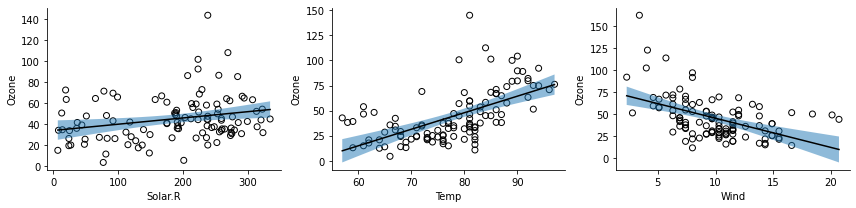

In [20]:
fit.plot_conditional()

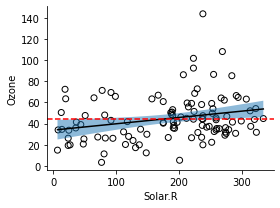

In [21]:
import matplotlib.pyplot as plt

fit.plot_conditional('Solar.R')
plt.axhline(44.5, color='red', ls='--')